# Qiudong Deng 
#qddeng@gmail.com


In [1]:
# var sections 
#set top num of words
n = 20
#set link of the paper
url = 'http://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt'

In [2]:
from urllib.request import urlopen

#with urlopen('http://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt') as src:
#    txt = src.readlines()
data = urlopen(url).read().decode()
#convert to text string
import re
import string
frequency = {}
text_string = data
type(text_string)

str

In [3]:
#define common words
common_words = ['a','able','about','across','after','all','almost','also',
                'am','among','an','and','any','are','as','at','be','because',
                'been','but','by','can','cannot','could','dear','did','do',
                'does','either','else','ever','every','for','from','get','got',
                'had','has','have','he','her','hers','him','his','how','however',
                'i','if','in','into','is','it','its','just','least','let','like',
                'likely','may','me','might','most','must','my','neither','no','nor',
                'not','of','off','often','on','only','or','other','our','out','own',
                'rather','said','say','says','she','should','since','so','some',
                'such','than','that','the','their','them','then','there','these',
                'they','this','to','too','us','wants','was','we','were','what',
                'when','where','which','while','who','whom','why','will','with',
                'would','yet','you','your','shall','these','one','here']

In [4]:
# remove space etc 
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
type(match_pattern)
#remove these common words from the text
#http://stackoverflow.com/questions/11434599/remove-list-from-list-in-python
new_list = list(filter(lambda v: v not in common_words, match_pattern))
#sorted(new_list)
print(len(new_list))
print(new_list[0:100])

342879
['file', 'presented', 'presented', 'cooperation', 'releases', 'placed', 'certain', 'copyright', 'implications', 'read', 'proud', 'cooperate', 'presentation', 'reading', 'education', 'entertainment', 'contacting', 'further', 'information', 'included', 'below', 'need', 'donations', 'file', 'named', 'txt', 'zip', 'etexts', 'new', 'txt', 'based', 'separate', 'sources', 'new', 'txt', 'further', 'information', 'call', 'email', 'julianc', 'netcom', 'com', 'give', 'thanks', 'cooperation', 'official', 'release', 'date', 'last', 'day', 'stated', 'month', 'preliminary', 'version', 'posted', 'suggestion', 'comment', 'editing', 'those', 'wish', 'sure', 'date', 'first', 'edition', 'xxx', 'please', 'check', 'file', 'sizes', 'first', 'week', 'next', 'month', 'ftp', 'program', 'bug', 'scrambles', 'date', 'tried', 'fix', 'failed', 'look', 'file', 'size', 'try', 'see', 'new', 'copy', 'byte', 'more', 'less', 'page', 'produce', 'two', 'million', 'dollars', 'each', 'hour', 'work', 'fifty']


In [5]:
#count word frequency
for word in new_list:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
#convert to a list 
ls = []  
for words in frequency_list:
    #print ( words, frequency[words])   
    ls.append((frequency[words],words))  
print(ls[0:100]) 
#sort the list according the word frequency
lssorted=sorted(ls,key=lambda ls:ls[0],reverse = True)
print(lssorted[0:100]) 


[(1, 'chalk'), (3, 'regia'), (254, 'near'), (1, 'grubb'), (2, 'freezes'), (22, 'pays'), (26, 'matters'), (1, 'snowed'), (3, 'supplications'), (1, 'plodding'), (2, 'observer'), (2, 'admonition'), (21, 'middle'), (3, 'tremblest'), (32, 'guarded'), (3, 'younker'), (4, 'privileg'), (1, 'grafters'), (1, 'waggoner'), (1, 'racking'), (1, 'scarecrows'), (2, 'pavement'), (1, 'misconceived'), (8, 'ginger'), (1, 'hist'), (1, 'ministration'), (1, 'occupat'), (11, 'jaws'), (7, 'generals'), (1, 'upping'), (2, 'eclips'), (25, 'tend'), (1, 'sapit'), (4, 'maidenheads'), (1, 'regular'), (1, 'coher'), (4, 'strut'), (1, 'wittiest'), (6, 'constantly'), (6, 'doctors'), (1, 'superstition'), (1, 'beldame'), (1, 'hushes'), (1, 'believest'), (1, 'comme'), (9, 'plea'), (4, 'assailed'), (3, 'insult'), (8, 'brands'), (3, 'indigest'), (1, 'stemming'), (1, 'nayward'), (53, 'meant'), (5, 'prone'), (8, 'echo'), (4, 'regreet'), (1, 'lifter'), (1, 'whencesoever'), (2, 'distributed'), (10, 'overcame'), (5, 'cracking'), (

In [6]:
import pandas as pd
df_lssorted = pd.DataFrame(lssorted,columns=('frequency','word'))
#set top num
topname = [*map('top{}words'.format, range(n, n+1))]
#convert list to string
topname=''.join(topname)
print (topname)
top = df_lssorted[0:n]
print(top)

top20words
    frequency    word
0        4594    thou
1        3634     thy
2        3162    thee
3        2282    good
4        2072    more
5        2071    love
6        2046    lord
7        1994     now
8        1966     man
9        1763     sir
10       1655    well
11       1650    hath
12       1650    know
13       1563    come
14       1473    make
15       1430    upon
16       1331     see
17       1076    mine
18       1051   heart
19       1034  father


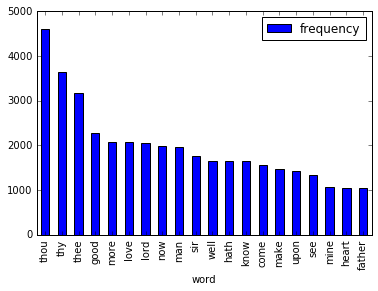

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
top.plot(x='word', y='frequency', kind='bar')
plt.show()